<Figure size 1280x320 with 0 Axes>

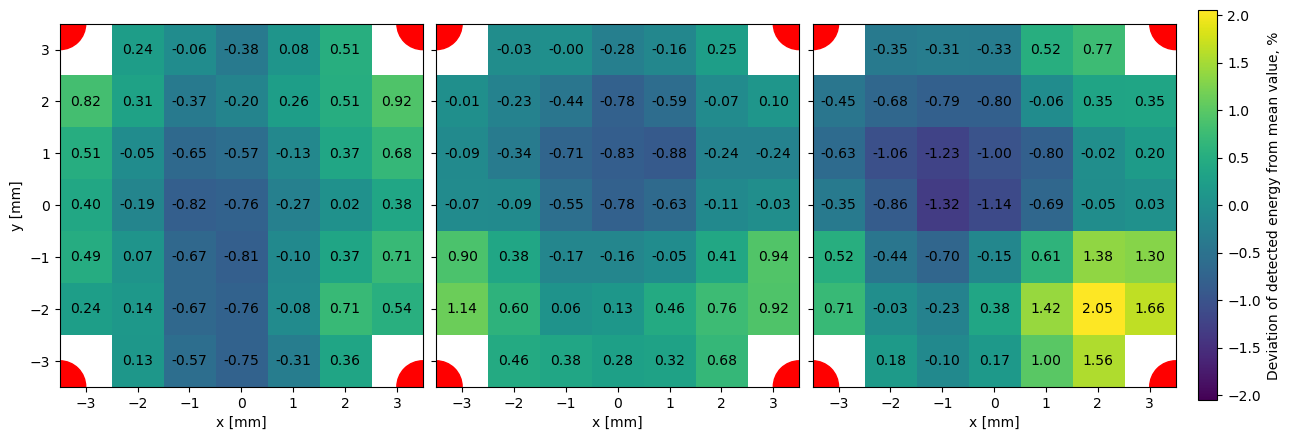

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

map1 = np.loadtxt("for_publication_efficiency_MAPCorner0_25GeV.txt")
map2 = np.loadtxt("for_publication_efficiency_MAPCorner1_25GeV.txt")
map3 = np.loadtxt("for_publication_efficiency_MAPCorner2_25GeV.txt")

maps = [map1, map2, map3]

plt.figure(figsize=( 6.4*2, 4.8*(2/3) ) )


amplitude = 0

for i, mesh in enumerate(maps):

    mesh_mean_primary = np.mean(mesh)

    mesh[0,0] = mesh_mean_primary
    mesh[0,6] = mesh_mean_primary
    mesh[6,0] = mesh_mean_primary
    mesh[6,6] = mesh_mean_primary

    mesh /= np.mean(mesh)

    mesh[:,:] = (mesh[:,:]-1)*100 # to work as with mutable

    if np.max(mesh) > amplitude: 
        
        amplitude = np.max(mesh)

    mesh[0,0] = np.inf
    mesh[0,6] = np.inf
    mesh[6,0] = np.inf
    mesh[6,6] = np.inf

fig, axes = plt.subplots(1,3, figsize=(6.4*2, 6.4*(2/3)), constrained_layout=True, sharey='row')


for map_number in range(len(maps)):

    map_transposed = np.transpose(maps[map_number])[::-1,:]

    im = axes[map_number].imshow(map_transposed, vmin = -amplitude, vmax = amplitude, extent=(-3.5, 3.5, -3.5, 3.5))

    for (j,i),label in np.ndenumerate(map_transposed):
        
        if label == np.inf:
            continue

        axes[map_number].text(i-3,3-j,"{:.2f}".format(label),ha='center',va='center')

    circle1 = plt.Circle(( 3.5,  3.5), 0.5, color='r')
    circle2 = plt.Circle(( 3.5, -3.5), 0.5, color='r')
    circle3 = plt.Circle((-3.5,  3.5), 0.5, color='r')
    circle4 = plt.Circle((-3.5, -3.5), 0.5, color='r')

    axes[map_number].add_patch(circle1)
    axes[map_number].add_patch(circle2)
    axes[map_number].add_patch(circle3)
    axes[map_number].add_patch(circle4)

axes[0].set_ylabel("y [mm]")

axes[0].set_xlabel("x [mm]")
axes[1].set_xlabel("x [mm]")
axes[2].set_xlabel("x [mm]")

colorbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.05, pad=0.02)
colorbar.set_label("Deviation of detected energy from mean value, %")